In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## f_disk en funcion del tiempo - GADGET

In [6]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')

#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
# aexp = aexp[::-1]

path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
#     print aexp[isnap]

#     lala

    for i in range(0,3):
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Velocities'].value
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)

    #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
        ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
        zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
        
#----------------------masas----------------------------
        mstr = mstr/h
        mgas = mgas/h
        mdrk = mdrk/h
        
        r200 = r200*aexp[isnap]/h
        
#         print 'r200 =', r200
        rgal=0.15*r200
        
        limit    = np.where(rstr<rgal)
        r_sort   = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])
        
        Mgal_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mgal_str[-1]
    

    #------------------ calculamos M90------------------------------------------
        razon  = Mgal_str/M_gal
        cincuenta,    = np.where(razon < 0.50)

        r50 = r_sort[cincuenta][-1]
        M50 = Mgal_str[cincuenta][-1]

    #--------------------------------------------         
        rtot = concatenate([rstr, rgas, rdrk])
        mtot = concatenate([mstr, mgas, mdrk])
        
        limit_tot   = np.where(rtot<r200)
        rtot_sort   = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])
        
        Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
        
        Mtot_50 = Mc_tot[np.where(rtot_sort < r50)][-1]
#-------------------------------------------------------------- 

        Vr50 = np.sqrt((G*Mtot_50*1e10)/r50)
        
        fdisk = Vr50 / np.sqrt((G*M_gal*1e10)/r50)
        
#         print fdisk
        
#--------------------------------------------------------------------------------------------------------------------

#         archivo1 =  open('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_fdisk_time.dat','a')
#         archivo1.write(str('%12.6f'% time) +'\t'+
#                        str('%12.6f'% fdisk) +'\t'+
#                        str('%12.6f'% r50) +'\t'+
#                        str('%12.6f'% (M_gal*1e10)) +'\t'+
#                        str('%12.6f'% (M50*1e10)) +'\t'+
#                        str('%12.6f'% (Mgas_50*1e10)) +'\t'+
#                        str('%12.6f'% (Mdrk_50*1e10)) +'\t'+
#                        str('%12.6f'% Vr50) +'\n')
#         archivo1.close()   
        
        archivo =  open('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_fdisk_time.dat','a')
        archivo.write(str('%12.6f'% time) +'\t'+
                      str('%12.6f'% fdisk) +'\n')
        archivo.close()

## f_disk en funcion del tiempo - GASOLINE

In [7]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np


G = 4.299e-6
a0=1
vector2 = ('M31','MW','M33')
vector = (1,2,4)

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path + 'Gasoline/snapshots.txt', dtype='string')


for j in range(len(snapshot)-1,0,-1):
    snap = h5py.File(path + 'Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

    for i in range(0,3):
        cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
        time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'].value
        h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
        aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value

        pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Masses'].value
        vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

        pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'].value

        pdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Coordinates'].value
        mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value


    #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0]) #*aexp
        ystr = (pstr[:,1]-cm[1])
        zstr = (pstr[:,2]-cm[2])
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

        xgas = (pgas[:,0]-cm[0])
        ygas = (pgas[:,1]-cm[1])
        zgas = (pgas[:,2]-cm[2])
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

        xdrk = (pdrk[:,0]-cm[0])
        ydrk = (pdrk[:,1]-cm[1])
        zdrk = (pdrk[:,2]-cm[2])
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

        v_x = vel[:,0]
        v_y = vel[:,1]
        v_z = vel[:,2]

    #----------------------masas----------------------------
        r200 = r200*aexp
        rgal=0.15*r200

        limit = np.where(rstr<rgal)
        r_sort = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])

        Mgal_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mgal_str[-1]
        
    #------------------ calculamos M90------------------------------------------
        razon = Mgal_str/M_gal
        cincuenta,    = np.where(razon < 0.50)
     
        r50 = r_sort[cincuenta][-1]
        M50 = Mgal_str[cincuenta][-1]
    
#--------------------------------------------------------------       
        rtot= concatenate([rstr, rgas, rdrk])
        mtot= concatenate([mstr, mgas, mdrk])

        limit_tot = np.where(rtot<r200)
        rtot_sort = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])

        Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
        
        Mtot_50 = Mc_tot[np.where(rtot_sort < r50)][-1]
#-------------------------------------------------------------- 

        Vr50 = np.sqrt((G*Mtot_50)/r50)
        
        fdisk = Vr50 / np.sqrt((G*M_gal)/r50)
        
#         print fdisk, time
        
#--------------------------------------------------------------------------------------------------------------------

#         archivo1 =  open('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_fdisk_time.dat','a')
#         archivo1.write(str('%12.6f'% time) +'\t'+
#                        str('%12.6f'% fdisk) +'\t'+
#                        str('%12.6f'% r50) +'\t'+
#                        str('%12.6f'% M_gal) +'\t'+
#                        str('%12.6f'% M50) +'\t'+
#                        str('%12.6f'% Mgas_50) +'\t'+
#                        str('%12.6f'% Mdrk_50) +'\t'+
#                        str('%12.6f'% Vr50) +'\n')
#         archivo1.close()
        
        
        archivo =  open('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_fdisk_time.dat','a')
        archivo.write(str('%12.6f'% time) +'\t'+
                      str('%12.6f'% fdisk) +'\n')
        archivo.close()

In [2]:
path = '/home/omarioni/'
M31_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_fdisk_time.dat')
time_M31gd  = M31_gd[:,0]
fdisk_M31gd = M31_gd[:,1]

#-------------------------------------------------------------------------------
path = '/home/omarioni/'
MW_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_fdisk_time.dat')
time_MWgd  = MW_gd[:,0]
fdisk_MWgd = MW_gd[:,1]

#-------------------------------------------------------------------------------
M33_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M33_fdisk_time.dat')
time_M33gd  = M33_gd[:,0]
fdisk_M33gd = M33_gd[:,1]

#-------------------------------------------------------------------------------
path = '/home/omarioni/'
M31_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_fdisk_time.dat')
time_M31gs  = M31_gs[:,0]
fdisk_M31gs = M31_gs[:,1]

#-------------------------------------------------------------------------------
path = '/home/omarioni/'
MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_fdisk_time.dat')
time_MWgs  = MW_gs[:,0]
fdisk_MWgs = MW_gs[:,1]

#-------------------------------------------------------------------------------
path = '/home/omarioni/'
M33_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M33_fdisk_time.dat')
time_M33gs  = M33_gs[:,0]
fdisk_M33gs = M33_gs[:,1]



In [3]:
path = '/home/omarioni/'
M31_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_lbarvstime2.dat')
time0_M31gd = M31_gd[:,0][-1]

#------------------------------------------------------------------------------------------
M31_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_lbarvstime2.dat')
time0_M31gs = M31_gs[:,0][-1]

#------------------------------------------------------------------------------------------
MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_lbarvstime2.dat')
time0_MWgs = MW_gs[:,0][-1]

## Mdrk50/M50 + Mgas50/M50

In [21]:
q1= smooth(Mtot_M31gd/np.sqrt(2.),window_len=100,window='hanning')
q2= smooth(Mtot_M31gs/np.sqrt(2.),window_len=3,window='hanning')
q3= smooth(Mtot_MWgd/np.sqrt(2.),window_len=11,window='hanning')
q4= smooth(Mtot_MWgs/np.sqrt(2.),window_len=11,window='hanning')
q5= smooth(Mtot_M33gd/np.sqrt(2.),window_len=11,window='hanning')
q6= smooth(Mtot_M33gs/np.sqrt(2.),window_len=11,window='hanning')


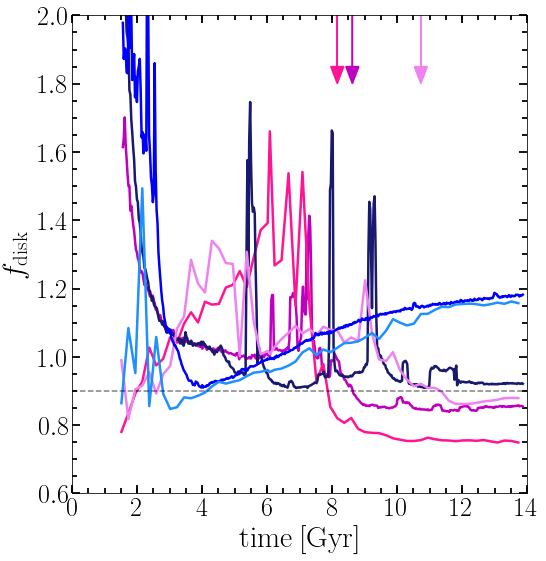

In [8]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
from __future__ import unicode_literals
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#, sharex=True, sharey=True)#, sharex=True,
#                        gridspec_kw = {'height_ratios':[2,1,2,1]})
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95, wspace=0, hspace= 0)

# ax.plot(time_M31gd, q1[:446],'-', lw=2, color = 'red',alpha=0.2)
ax.plot(time_M31gd, fdisk_M31gd,'-', lw=2.5, color = 'm')
# ax.plot(time_M31gs, q2[:len(time_M31gs)],'-', lw=2, color = 'deeppink')
ax.plot(time_M31gs, fdisk_M31gs,'-', lw=2.5, color = 'deeppink')
# ax.plot(time_MWgd,  q3[:len(time_MWgd)] ,'-', lw=2, color = 'navy')
ax.plot(time_MWgd,  fdisk_MWgd ,'-', lw=2.5, color = 'midnightblue')
ax.plot(time_MWgs,  fdisk_MWgs ,'-', lw=2.5, color = 'violet')
ax.plot(time_M33gd, fdisk_M33gd,'-', lw=2.5, color = 'blue')
ax.plot(time_M33gs, fdisk_M33gs,'-', lw=2.5, color = 'dodgerblue')
 
ax.set_xlim(0,14)
ax.set_ylim(0.6,2)
# ax.set_yscale('log')
ax.set_xticks([0,2,4,6,8,10,12,14])
# ax.set_yticks(np.arange(1,5,1))
# ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_ylabel(r'$f_{\mathrm{disk}}$',fontsize=30)
ax.set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=30)
ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax.xaxis.set_minor_locator(MultipleLocator(1/2.))
# ax.yaxis.set_minor_locator(MultipleLocator(1/5.))
# ax.yaxis.set_minor_formatter(NullFormatter())
ax.axhline(y=0.9,ls='--',lw=1.5, color='k',alpha=0.5)
ax.arrow(x=time0_M31gd,y=2.,dx=0,dy=-0.2,color='m', lw=1.5,
         head_length=0.05,head_width=0.4,length_includes_head=True)
ax.arrow(x=time0_M31gs,y=2.,dx=0,dy=-0.2,color='deeppink', lw=1.5,
         head_length=0.05,head_width=0.4,length_includes_head=True)
ax.arrow(x=time0_MWgs,y=2.,dx=0,dy=-0.2,color='violet', lw=1.5,
         head_length=0.05,head_width=0.4,length_includes_head=True)

# plt.legend(framealpha=0.5)
# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/fdisk_time.pdf', dpi = 100, xxbox_inches='tight')
plt.show()

In [12]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

In [33]:
np.arange(0.7,5,0.1)

array([ 0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,
        2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,
        4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

## Mdrk50/M50 + Mgas50/M50

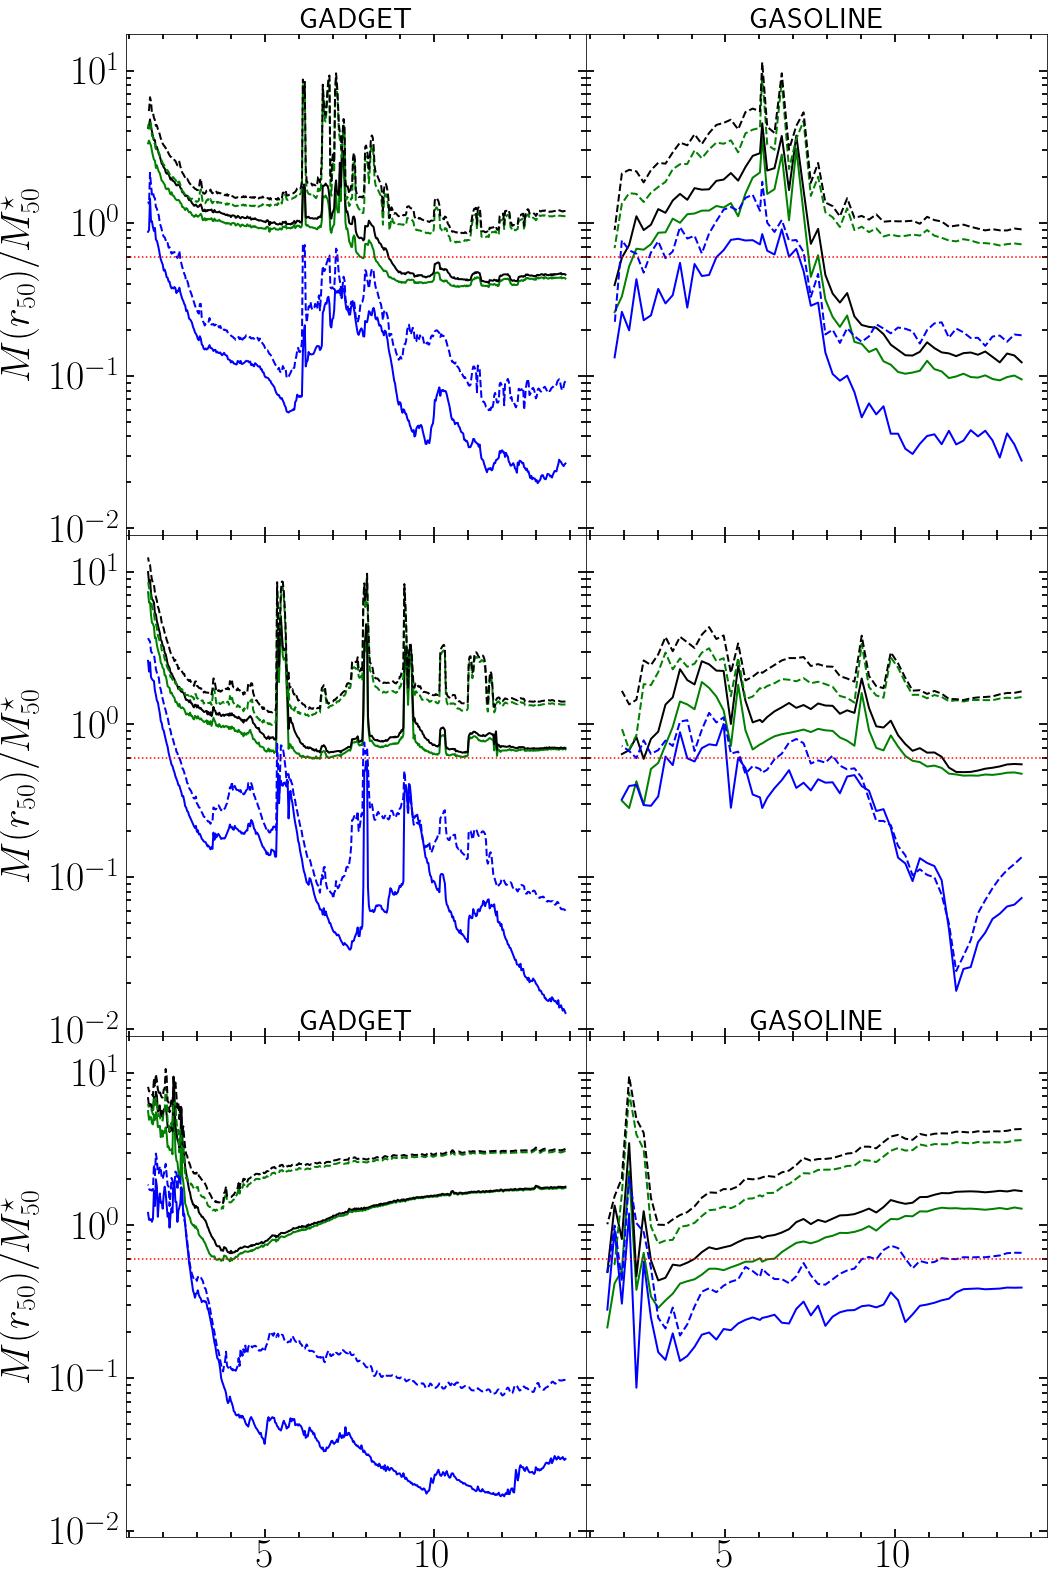

In [20]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.patches as patches
from matplotlib.colors import LogNorm


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 24), sharex=True, sharey=True)#, sharex=True,
#                        gridspec_kw = {'height_ratios':[2,1,2,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.90, top = 0.95, wspace=0, hspace= 0)



# ax[0,0].plot(bines, np.log10(density_M31gd*1e10),'-', lw=2, color = 'k')
ax[0,0].plot(time_M31gd, Mdm50_M31gd/M50_M31gd,'-', lw=2, color = 'g')
ax[0,0].plot(time_M31gd, Mg50_M31gd/M50_M31gd,'-', lw=2, color = 'b')
ax[0,0].plot(time_M31gd, Mdm50_M31gd/M50_M31gd + Mg50_M31gd/M50_M31gd ,'-', lw=2, color = 'k')

ax[0,0].plot(time_M31gd, Mdm75_M31gd/M75_M31gd,'--', lw=2, color = 'g')
ax[0,0].plot(time_M31gd, Mg75_M31gd/M75_M31gd,'--', lw=2, color = 'b')
ax[0,0].plot(time_M31gd, Mg75_M31gd/M75_M31gd + Mdm75_M31gd/M75_M31gd,'--', lw=2, color = 'k')

# ax[0,0].set_xlim(2,14)
# ax[0,0].set_xticks([2,4,6,8,10,12,14])
# ax[0,0].set_xticklabels([])
ax[0,0].set_yscale('log')
# ax[0,0].set_ylim(-0.2,1)
# ax[0,0].set_yticks([8.,8.5,9.,9.5,10.])
# ax[0,0].set_yticklabels([8.,8.5,9.,9.5,10.])
ax[0,0].set_ylabel(r'$M(r_{50})/M^{\star}_{50}$',fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,0].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].set_title('GADGET', loc='center', fontsize=30)
ax[0,0].axhline(y=0.6,ls=':', color='r')
#---------------------------------

ax[0,1].plot(time_M31gs, Mdm50_M31gs/M50_M31gs,'-', lw=2, color = 'g')
ax[0,1].plot(time_M31gs, Mg50_M31gs/M50_M31gs,'-', lw=2, color = 'b')
ax[0,1].plot(time_M31gs, Mg50_M31gs/M50_M31gs + Mdm50_M31gs/M50_M31gs,'-', lw=2, color = 'k')

ax[0,1].plot(time_M31gs, Mdm75_M31gs/M75_M31gs,'--', lw=2, color = 'g')
ax[0,1].plot(time_M31gs, Mg75_M31gs/M75_M31gs,'--', lw=2, color = 'b')
ax[0,1].plot(time_M31gs, Mg75_M31gs/M75_M31gs + Mdm75_M31gs/M75_M31gs,'--', lw=2, color = 'k')
# ax[0,1].set_xlim(2,14)
# ax[0,1].set_xticks([2,4,6,8,10,12,14])
# ax[0,1].set_xticklabels([])
# ax[0,1].set_ylim(8,10)
# ax[0,1].set_yticks([8.,8.5,9.,9.5,10.])
# ax[0,1].set_yticklabels([])
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,1].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
ax[0,1].set_title('GASOLINE', loc='center', fontsize=30)
ax[0,1].axhline(y=0.6,ls=':', color='r')

#---------------------------------

ax[1,0].plot(time_MWgd, Mdm50_MWgd/M50_MWgd,'-', lw=2, color = 'g')
ax[1,0].plot(time_MWgd, Mg50_MWgd/M50_MWgd,'-', lw=2, color = 'b')
ax[1,0].plot(time_MWgd, Mg50_MWgd/M50_MWgd +Mdm50_MWgd/M50_MWgd,'-', lw=2, color = 'k')

ax[1,0].plot(time_MWgd, Mdm75_MWgd/M75_MWgd,'--', lw=2, color = 'g')
ax[1,0].plot(time_MWgd, Mg75_MWgd/M75_MWgd,'--', lw=2, color = 'b')
ax[1,0].plot(time_MWgd, Mg75_MWgd/M75_MWgd + Mdm75_MWgd/M75_MWgd,'--', lw=2, color = 'k')
# ax[1,0].set_xlim(2,14)
# ax[1,0].set_xticks([2,4,6,8,10,12])
# ax[1,0].set_xticklabels([2,4,6,8,10,12])
# ax[1,0].set_ylim(8,10)
# ax[1,0].set_yticks([8.,8.5,9.,9.5,10.])
# ax[1,0].set_yticklabels([8.,8.5,9.,9.5])
ax[1,0].set_xlabel(r'$time \: [Gyr]$', fontsize=40)
ax[1,0].set_ylabel(r'$M(r_{50})/M^{\star}_{50}$',fontsize=40)
# ax[1,0].set_yscale('log')
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[1,0].text(4, 9.75,'B', fontsize=30, color='k', ha='center', va='center')
ax[1,0].axhline(y=0.6,ls=':', color='r')

#---------------------------------

ax[1,1].plot(time_MWgs, Mdm50_MWgs/M50_MWgs,'-', lw=2, color = 'g')
ax[1,1].plot(time_MWgs, Mg50_MWgs/M50_MWgs,'-', lw=2, color = 'b')
ax[1,1].plot(time_MWgs, Mg50_MWgs/M50_MWgs+Mdm50_MWgs/M50_MWgs,'-', lw=2, color = 'k')

ax[1,1].plot(time_MWgs, Mdm75_MWgs/M75_MWgs,'--', lw=2, color = 'g')
ax[1,1].plot(time_MWgs, Mg75_MWgs/M75_MWgs,'--', lw=2, color = 'b')
ax[1,1].plot(time_MWgs, Mg75_MWgs/M75_MWgs+Mdm75_MWgs/M75_MWgs,'--', lw=2, color = 'k')
# ax[1,1].set_xlim(2,14)
# ax[1,1].set_xticks([2,4,6,8,10,12,14])
# ax[1,1].set_xticklabels([2,4,6,8,10,12,14])
# ax[1,1].set_ylim(8,10)
# ax[1,1].set_yticks([8.,8.5,9.,9.5])
# ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel(r'$time \: [Gyr]$', fontsize=40)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[1,1].text(4, 9.75,'B', fontsize=30, color='k', ha='center', va='center') 
# ax[1,1].plot(0,0,'k+', markersize=20, color='k')
ax[1,1].axhline(y=0.6,ls=':', color='r')

#----------------------------------------------------------------
ax[2,0].plot(time_M33gd, Mdm50_M33gd/M50_M33gd,'-', lw=2, color = 'g')
ax[2,0].plot(time_M33gd, Mg50_M33gd/M50_M33gd,'-', lw=2, color = 'b')
ax[2,0].plot(time_M33gd, Mdm50_M33gd/M50_M33gd + Mg50_M33gd/M50_M33gd ,'-', lw=2, color = 'k')

ax[2,0].plot(time_M33gd, Mdm75_M33gd/M75_M33gd,'--', lw=2, color = 'g')
ax[2,0].plot(time_M33gd, Mg75_M33gd/M75_M33gd,'--', lw=2, color = 'b')
ax[2,0].plot(time_M33gd, Mg75_M33gd/M75_M33gd + Mdm75_M33gd/M75_M33gd,'--', lw=2, color = 'k')

# ax[0,0].set_xlim(2,14)
# ax[0,0].set_xticks([2,4,6,8,10,12,14])
# ax[0,0].set_xticklabels([])
ax[2,0].set_yscale('log')
# ax[0,0].set_ylim(-0.2,1)
# ax[0,0].set_yticks([8.,8.5,9.,9.5,10.])
# ax[0,0].set_yticklabels([8.,8.5,9.,9.5,10.])
ax[2,0].set_ylabel(r'$M(r_{50})/M^{\star}_{50}$',fontsize=40)
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=40)
ax[2,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[2,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,0].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[2,0].set_title('GADGET', loc='center', fontsize=30)
ax[2,0].axhline(y=0.6,ls=':', color='r')
#---------------------------------

ax[2,1].plot(time_M33gs, Mdm50_M33gs/M50_M33gs,'-', lw=2, color = 'g')
ax[2,1].plot(time_M33gs, Mg50_M33gs/M50_M33gs,'-', lw=2, color = 'b')
ax[2,1].plot(time_M33gs, Mg50_M33gs/M50_M33gs + Mdm50_M33gs/M50_M33gs,'-', lw=2, color = 'k')

ax[2,1].plot(time_M33gs, Mdm75_M33gs/M75_M33gs,'--', lw=2, color = 'g')
ax[2,1].plot(time_M33gs, Mg75_M33gs/M75_M33gs,'--', lw=2, color = 'b')
ax[2,1].plot(time_M33gs, Mg75_M33gs/M75_M33gs + Mdm75_M33gs/M75_M33gs,'--', lw=2, color = 'k')
# ax[0,1].set_xlim(2,14)
# ax[0,1].set_xticks([2,4,6,8,10,12,14])
# ax[0,1].set_xticklabels([])
# ax[0,1].set_ylim(8,10)
# ax[0,1].set_yticks([8.,8.5,9.,9.5,10.])
# ax[0,1].set_yticklabels([])
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=40)
ax[2,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[2,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,1].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
ax[2,1].set_title('GASOLINE', loc='center', fontsize=30)
ax[2,1].axhline(y=0.6,ls=':', color='r')

# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
# fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Mdrk50Mgas50_time.pdf', dpi = 100, xxbox_inches='tight')
plt.show()

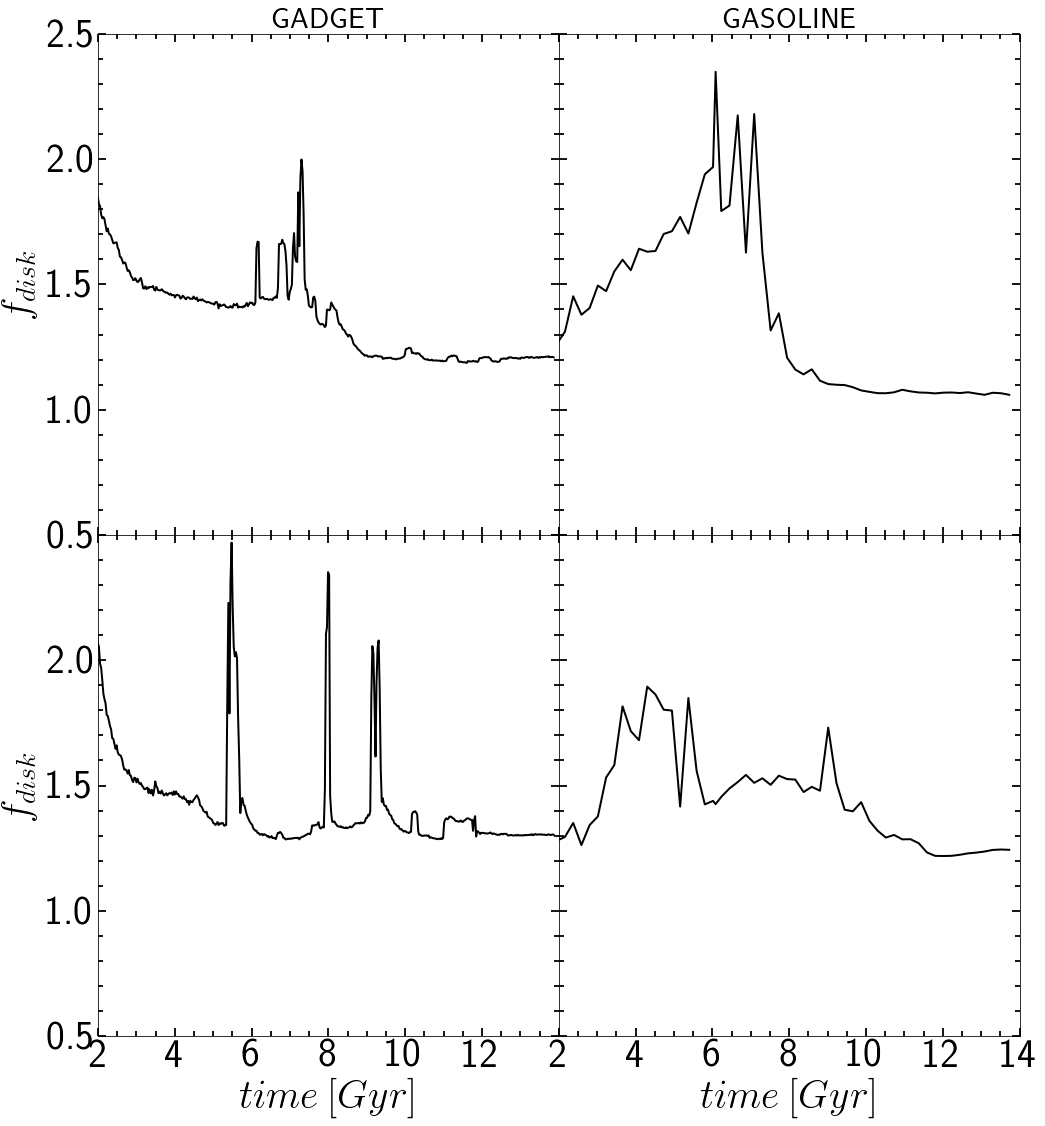

In [38]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.patches as patches
# from matplotlib.colors import LogNorm


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))# sharex=True, sharey=True)#, sharex=True,
#                        gridspec_kw = {'height_ratios':[2,1,2,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.90, top = 0.95, wspace=0, hspace= 0)



# ax[0,0].plot(bines, np.log10(density_M31gd*1e10),'-', lw=2, color = 'k')
ax[0,0].plot(time_M31gd, fdisk_M31gd,'-', lw=2, color = 'k')
ax[0,0].set_xlim(2,14)
ax[0,0].set_xticks([2,4,6,8,10,12,14])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylim(0.5,2.5)
ax[0,0].set_yticks([0.5,1.,1.5,2.,2.5])
ax[0,0].set_yticklabels([0.5,1.,1.5,2.,2.5])
ax[0,0].set_ylabel(r'$f_{disk}$',fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,0].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].set_title('GADGET', loc='center', fontsize=30)

#---------------------------------

ax[0,1].plot(time_M31gs, fdisk_M31gs,'-', lw=2, color = 'k')
ax[0,1].set_xlim(2,14)
ax[0,1].set_xticks([2,4,6,8,10,12,14])
ax[0,1].set_xticklabels([])
ax[0,1].set_ylim(0.5,2.5)
ax[0,1].set_yticks([0.5,1.,1.5,2.,2.5])
ax[0,1].set_yticklabels([])
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,1].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
ax[0,1].set_title('GASOLINE', loc='center', fontsize=30)

#---------------------------------

ax[1,0].plot(time_MWgd, fdisk_MWgd,'-', lw=2, color = 'k')
ax[1,0].set_xlim(2,14)
ax[1,0].set_xticks([2,4,6,8,10,12,14])
ax[1,0].set_xticklabels([2,4,6,8,10,12])
ax[1,0].set_ylim(0.5,2.5)
ax[1,0].set_yticks([0.5,1.,1.5,2.,2.5])
ax[1,0].set_yticklabels([0.5,1.,1.5,2.0])
ax[1,0].set_xlabel(r'$time \: [Gyr]$', fontsize=40)
ax[1,0].set_ylabel(r'$f_{disk}$',fontsize=40)
# ax[1,0].set_yscale('log')
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[1,0].text(4, 9.75,'B', fontsize=30, color='k', ha='center', va='center')

#---------------------------------

ax[1,1].plot(time_MWgs, fdisk_MWgs,'-', lw=2, color = 'k')
ax[1,1].set_xlim(2,14)
ax[1,1].set_xticks([2,4,6,8,10,12,14])
ax[1,1].set_xticklabels([2,4,6,8,10,12,14])
ax[1,1].set_ylim(0.5,2.5)
ax[1,1].set_yticks([0.5,1.,1.5,2.,2.5])
ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel(r'$time \: [Gyr]$', fontsize=40)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[1,1].text(4, 9.75,'B', fontsize=30, color='k', ha='center', va='center') 
# ax[1,1].plot(0,0,'k+', markersize=20, color='k')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/fdisk_time.pdf', dpi = 100, xxbox_inches='tight')
plt.show()


## r_50 vs time

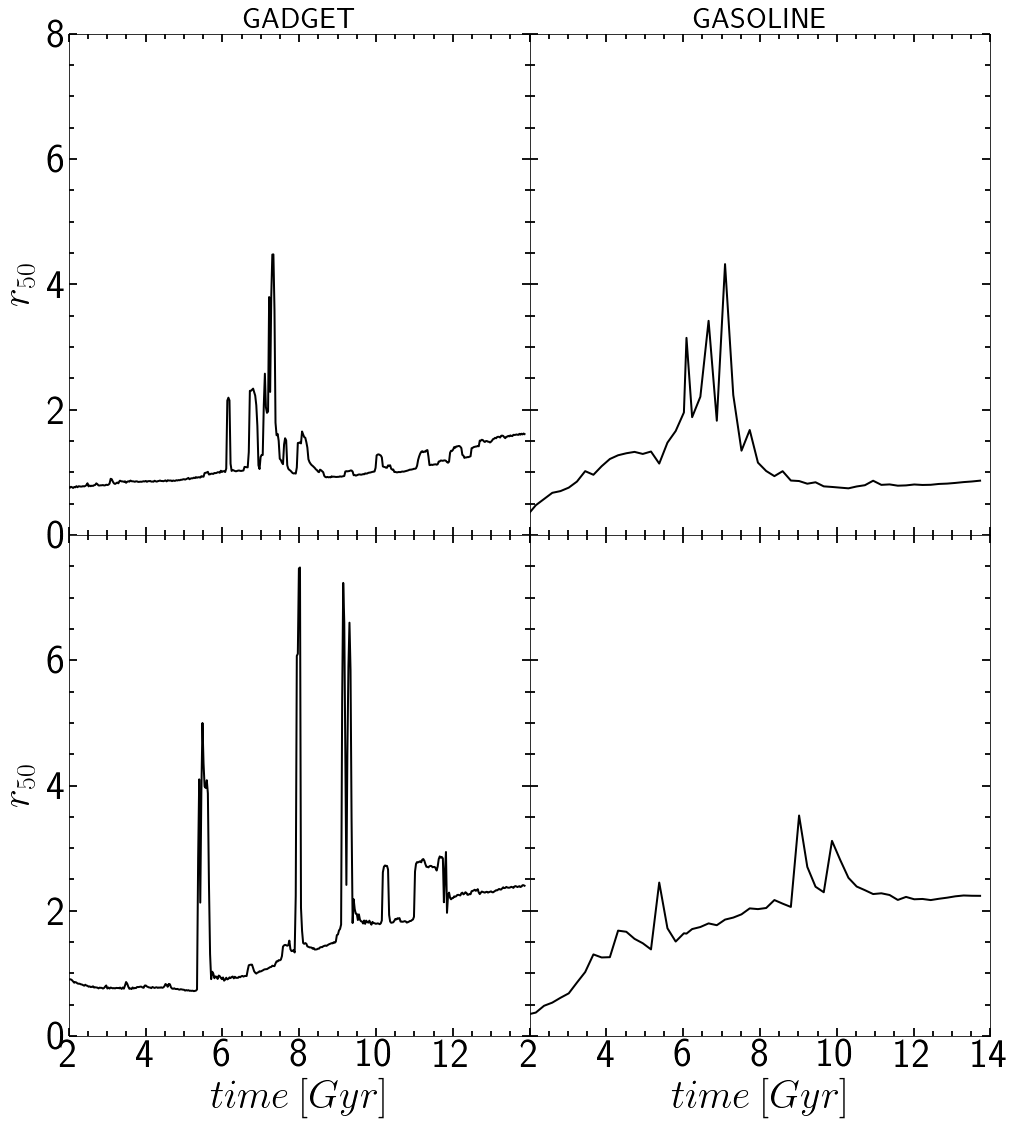

In [39]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.patches as patches
from matplotlib.colors import LogNorm


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))#, sharex=True, sharey=True)#, sharex=True,
#                        gridspec_kw = {'height_ratios':[2,1,2,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.90, top = 0.95, wspace=0, hspace= 0)



# ax[0,0].plot(bines, np.log10(density_M31gd*1e10),'-', lw=2, color = 'k')
ax[0,0].plot(time_M31gd, r50_M31gd,'-', lw=2, color = 'k')
ax[0,0].set_xlim(2,14)
ax[0,0].set_xticks([2,4,6,8,10,12,14])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylim(0,8)
ax[0,0].set_yticks([0,2,4,6,8])
ax[0,0].set_yticklabels([0,2,4,6,8])
ax[0,0].set_ylabel(r'$r_{50}$',fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,0].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].set_title('GADGET', loc='center', fontsize=30)

#---------------------------------

ax[0,1].plot(time_M31gs, r50_M31gs,'-', lw=2, color = 'k')
ax[0,1].set_xlim(2,14)
ax[0,1].set_xticks([2,4,6,8,10,12,14])
ax[0,1].set_xticklabels([])
ax[0,1].set_ylim(0,8)
ax[0,1].set_yticks([0,2,4,6,8])
ax[0,1].set_yticklabels([])
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,1].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
ax[0,1].set_title('GASOLINE', loc='center', fontsize=30)

#---------------------------------

ax[1,0].plot(time_MWgd, r50_MWgd,'-', lw=2, color = 'k')
ax[1,0].set_xlim(2,14)
ax[1,0].set_xticks([2,4,6,8,10,12,14])
ax[1,0].set_xticklabels([2,4,6,8,10,12])
ax[1,0].set_ylim(0,8)
ax[1,0].set_yticks([0,2,4,6])
ax[1,0].set_yticklabels([0,2,4,6])
ax[1,0].set_xlabel(r'$time \: [Gyr]$', fontsize=40)
ax[1,0].set_ylabel(r'$r_{50}$',fontsize=40)
# ax[1,0].set_yscale('log')
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[1,0].text(4, 9.75,'B', fontsize=30, color='k', ha='center', va='center')

#---------------------------------

ax[1,1].plot(time_MWgs, r50_MWgs,'-', lw=2, color = 'k')
ax[1,1].set_xlim(2,14)
ax[1,1].set_xticks([2,4,6,8,10,12,14])
ax[1,1].set_xticklabels([2,4,6,8,10,12,14])
ax[1,1].set_ylim(0,8)
ax[1,1].set_yticks([0,2,4,6])
ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel(r'$time \: [Gyr]$', fontsize=40)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[1,1].text(4, 9.75,'B', fontsize=30, color='k', ha='center', va='center') 
# ax[1,1].plot(0,0,'k+', markersize=20, color='k')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/r50_time.pdf', dpi = 100, xxbox_inches='tight')
plt.show()


## M_gal vs time

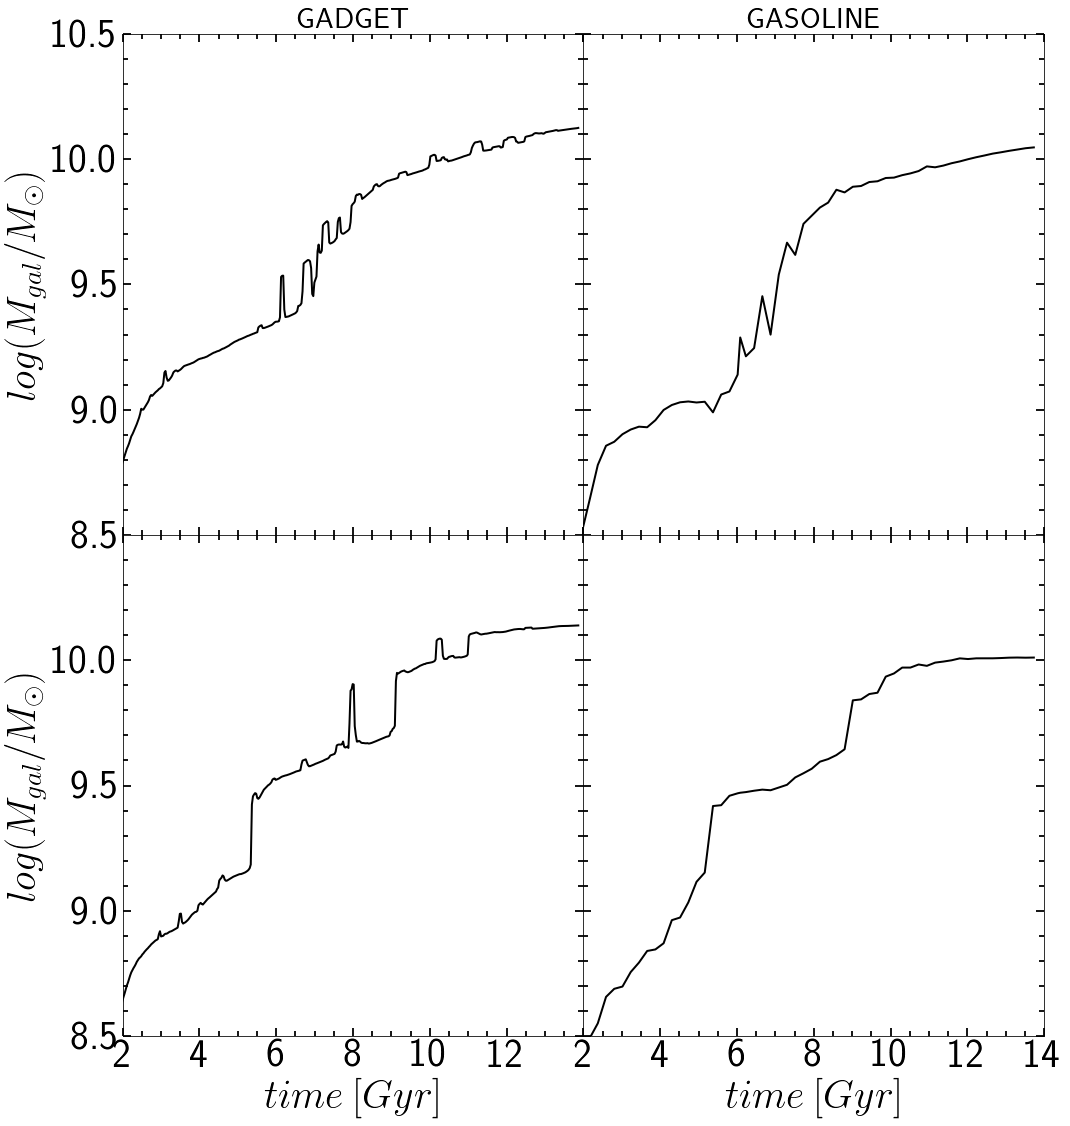

In [46]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
import matplotlib.patches as patches
from matplotlib.colors import LogNorm


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))#, sharex=True, sharey=True)#, sharex=True,
#                        gridspec_kw = {'height_ratios':[2,1,2,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.90, top = 0.95, wspace=0, hspace= 0)



# ax[0,0].plot(bines, np.log10(density_M31gd*1e10),'-', lw=2, color = 'k')
ax[0,0].plot(time_M31gd, np.log10(Mgal_M31gd),'-', lw=2, color = 'k')
ax[0,0].set_xlim(2,14)
ax[0,0].set_xticks([2,4,6,8,10,12,14])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylim(8.5,10.5)
ax[0,0].set_yticks([8.5,9.,9.5,10.,10.5])
ax[0,0].set_yticklabels([8.5,9.,9.5,10.,10.5])
# ax[0,0].set_yscale('log')
ax[0,0].set_ylabel(r'$log(M_{gal}/M_{\odot})$',fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,0].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].set_title('GADGET', loc='center', fontsize=30)

#---------------------------------

ax[0,1].plot(time_M31gs, np.log10(Mgal_M31gs),'-', lw=2, color = 'k')
ax[0,1].set_xlim(2,14)
ax[0,1].set_xticks([2,4,6,8,10,12,14])
ax[0,1].set_xticklabels([])
ax[0,1].set_ylim(8.5,10.5)
ax[0,1].set_yticks([8.5,9.,9.5,10.,10.5])
ax[0,1].set_yticklabels([])
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[0,1].text(4, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
ax[0,1].set_title('GASOLINE', loc='center', fontsize=30)

#---------------------------------

ax[1,0].plot(time_MWgd, np.log10(Mgal_MWgd),'-', lw=2, color = 'k')
ax[1,0].set_xlim(2,14)
ax[1,0].set_xticks([2,4,6,8,10,12])
ax[1,0].set_xticklabels([2,4,6,8,10,12])
ax[1,0].set_ylim(8.5,10.5)
ax[1,0].set_yticks([8.5,9.,9.5,10.])
ax[1,0].set_yticklabels([8.5,9.,9.5,10.])
ax[1,0].set_xlabel(r'$time \: [Gyr]$', fontsize=40)
ax[1,0].set_ylabel(r'$log(M_{gal}/M_{\odot})$',fontsize=40)
# ax[1,0].set_yscale('log')
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[1,0].text(4, 9.75,'B', fontsize=30, color='k', ha='center', va='center')

#---------------------------------

ax[1,1].plot(time_MWgs, np.log10(Mgal_MWgs),'-', lw=2, color = 'k')
ax[1,1].set_xlim(2,14)
ax[1,1].set_xticks([2,4,6,8,10,12,14])
ax[1,1].set_xticklabels([2,4,6,8,10,12,14])
ax[1,1].set_ylim(8.5,10.5)
ax[1,1].set_yticks([8.5,9.,9.5,10.])
ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel(r'$time \: [Gyr]$', fontsize=40)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
# ax[1,1].text(4, 9.75,'B', fontsize=30, color='k', ha='center', va='center') 
# ax[1,1].plot(0,0,'k+', markersize=20, color='k')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Mgal_time.pdf', dpi = 100, xxbox_inches='tight')
plt.show()
